In [4]:
import qmcpy as qp
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import cProfile
import pstats

In [5]:
def natural(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural",is_parallel=False)
    points = l.gen_samples(num_ports) 
    return points
def linear(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,is_parallel=False)
    points = l.gen_samples(num_ports) 
    return points
def mps(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,is_parallel=False)
    points = l.gen_samples(num_ports) 
    return points
def natural_job(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear",is_parallel=True,exper_process=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_job(n, num_ports, seed=None):
    return 2 ** 1000
def mps_job(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps",is_parallel=True,exper_process=True)
    points = l.gen_samples(num_ports) 
    return points


In [11]:
trials = 3
d_list = [50, 100, 200, 500, 1400, 3500]
n = 10
data = {'index':d_list}
frame = pd.DataFrame(data)
frame = frame.set_index('index')
names = set()


run_list = [(natural, "natural"),(linear, "linear"),(mps,"mps"),(natural_job, "natural job"),(linear_job,"linear job"),(mps_job,"mps job")]


for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in d_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    frame[method_name] = times  
stats.sort_stats('cumulative')

names = list(names)     
 
print(frame) 



        natural    linear       mps  natural job    linear job   mps job
index                                                                   
50     0.035649  0.013181  0.015662     0.010837  5.000000e-07  0.997486
100    0.026462  0.020086  0.020027     0.019278  2.000000e-07  0.046964
200    0.044551  0.039326  0.039923     0.038739  0.000000e+00  0.101002
500    0.106075  0.089903  0.099596     0.091454  1.000000e-07  0.137886
1400   0.257160  0.242740  0.269698     0.251069  3.000000e-07  0.277535
3500   0.641963  0.632081  0.659990     0.610916  2.000000e-07  0.626232


In [13]:
comparse= [('mps','mps job'),('linear','linear job'),('natural','natural job')]


def speed_up_cal(data_frame, compare_list, dimension_list):
    result = []
    for seq,pro in compare_list:
        result = []
        for x in dimension_list:
            a = data_frame[seq][x]
            b = data_frame[pro][x]
            result.append(a/b)
        data_frame[seq + " speed-up"] = result


speed_up_cal(frame, comparse, d_list)
#print(frame)

C:\Users\Baron\AppData\Local\Temp\ipykernel_29344\3568929607.py:11


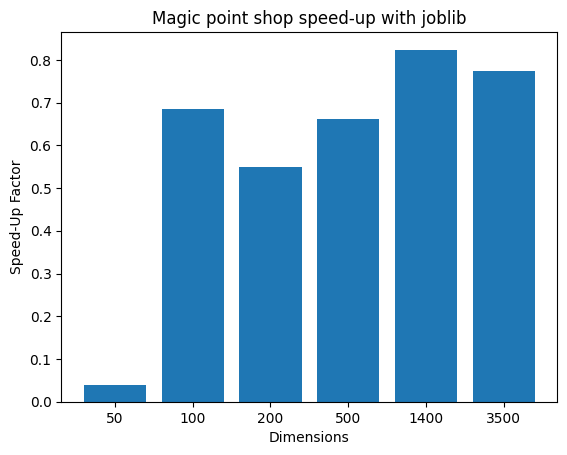

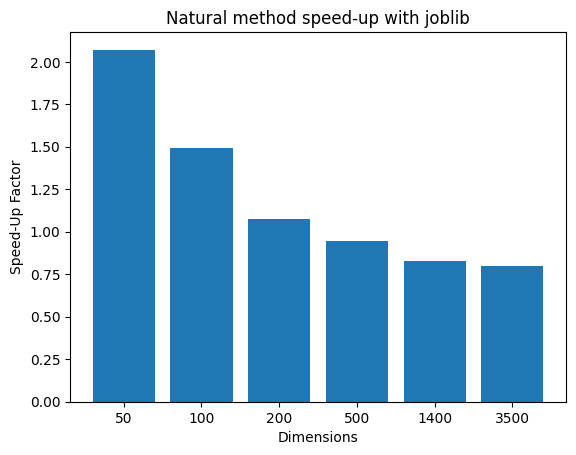

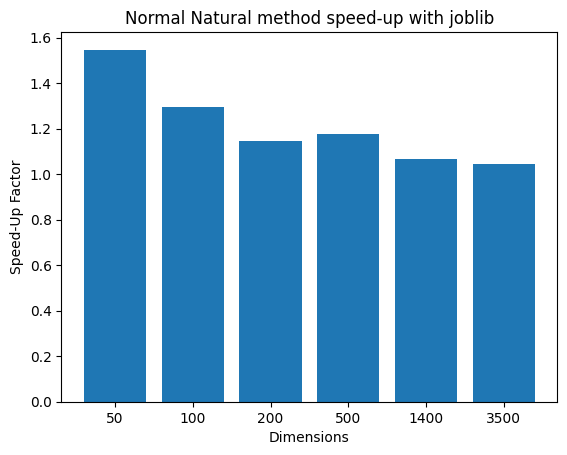

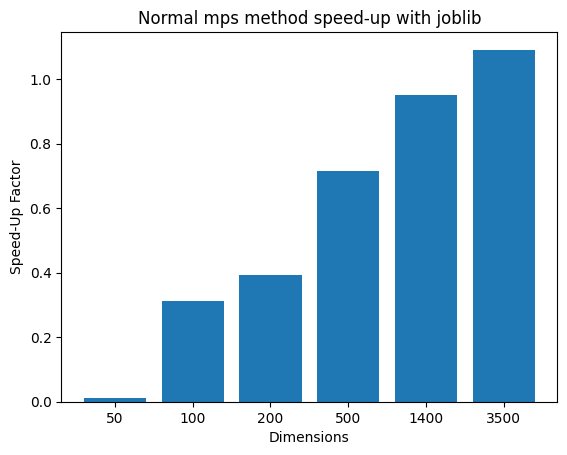

In [9]:
x = lambda array: [str(x) for x in array]

y_axis = frame["mps thread speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop speed-up with joblib')
plt.show()

y_axis = frame["natural thread speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed-up with joblib')
plt.show()

y_axis = frame["natural speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Normal Natural method speed-up with joblib')
plt.show()

y_axis = frame["mps speed-up"].to_numpy()
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Normal mps method speed-up with joblib')
plt.show()

In [12]:
d = 10
p_list = [35, 3_500, 35_000]
records = {'index':p_list}
frame2 = pd.DataFrame(records)
frame2 = frame2.set_index('index')
names = set()



for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for p in p_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(2 ** d, p)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        times.append(process_time)
        
    frame2[method_name] = times  
stats.sort_stats('cumulative')

names = list(names)     
 
print(frame2) 

        natural     linear       mps  natural job    linear job   mps job
index                                                                    
35     0.018507   0.014037  0.013143     0.013348  1.000000e-06  0.849962
3500   0.691495   0.709726  0.696657     0.822245  4.000000e-07  0.679630
35000  9.026843  11.479022  9.444165    11.459806  4.000000e-07  8.227818


In [55]:



speed_up_cal(frame2, comparse, p_list)
print(frame2)


          mps job  mps thread  natural job  natural thread    natural  \
index                                                                   
35       0.819904    0.202830     0.089880        0.269345   0.072711   
3500     0.218677    0.255711     0.278267        0.196859   0.261839   
35000    2.662345    2.969074     3.805116        2.198648   3.060980   
350000  41.931187   72.187246   101.493784       26.961906  32.092342   

              mps  mps thread speed-up  natural thread speed-up  mps speed-up  \
index                                                                           
35       0.059824             0.247383                 2.996725      0.072964   
3500     0.275118             1.169355                 0.707447      1.258102   
35000    3.166954             1.115210                 0.577814      1.189536   
350000  28.313901             1.721565                 0.265651      0.675247   

        natural speed-up  
index                     
35              0.80

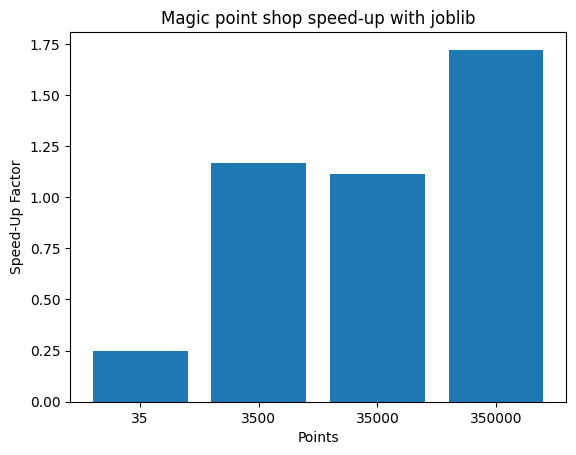

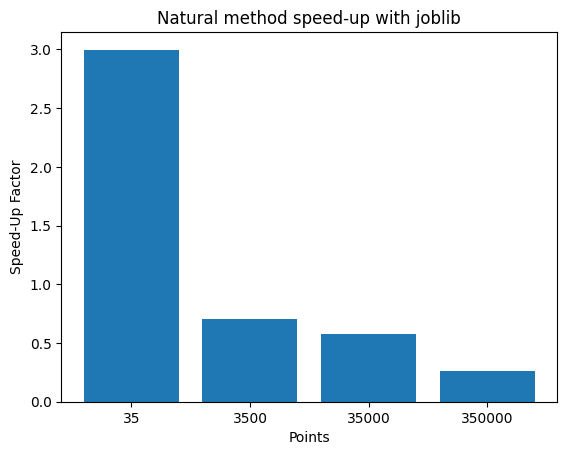

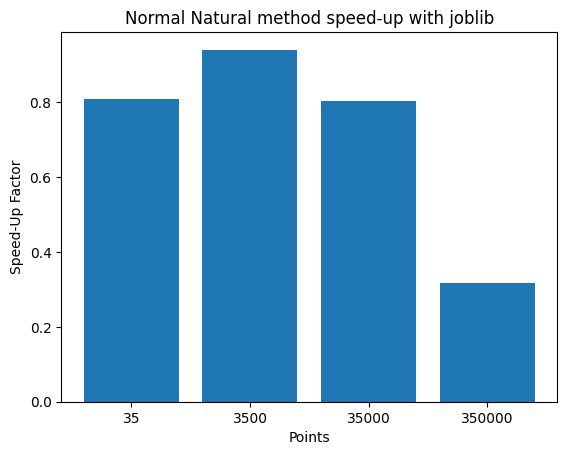

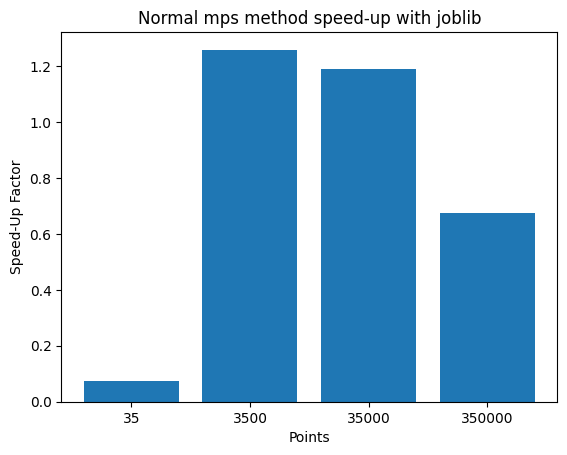

In [65]:
x = lambda array: [str(x) for x in array]

y_axis = frame2["mps thread speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop speed-up with joblib')
plt.show()

y_axis = frame2["natural thread speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed-up with joblib')
plt.show()

y_axis = frame2["natural speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Normal Natural method speed-up with joblib')
plt.show()

y_axis = frame2["mps speed-up"].to_numpy()
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Normal mps method speed-up with joblib')
plt.show()

